In [1]:
# Based on the article "Train/Test Split and Cross Validation in Python"
# written by Adi Bronshtein
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6


In [2]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
# Load the Diabetes Housing dataset

# Declare the columns name
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()

# Call the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

# Load the dataset as a pandas data frame
df = pd.DataFrame(diabetes.data, columns=columns)

# Define the target variable
y = diabetes.target

In [4]:
# Create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
# Fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [6]:
predictions[0:5]

array([142.20766221, 164.63563193,  85.76004484, 204.86678278,
       207.20776753])

Text(0,0.5,'Predictions')

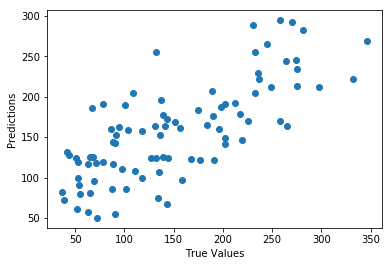

In [7]:
# The model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [8]:
print("Score:", model.score(X_test, y_test))

Score: 0.5474028079806983


In [9]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

C:\Users\ica\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Perform 6-fold cross validation

scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores: ", scores)

Cross-validated scores:  [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


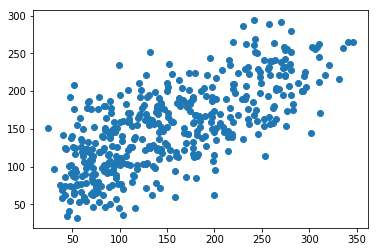

In [11]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

In [12]:
# Check how accurate the model is
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy: ", accuracy)

Cross-Predicted Accuracy:  0.4908065838640775
